### Import Libraries

In [31]:
import pandas as pd
from scripts.utility import load_dataset

### Read datasets

In [32]:
benin = load_dataset('benin_clean.csv', parse_dates=['Timestamp'])

In [33]:
sierraleone = load_dataset('sierraleone_clean.csv', parse_dates=['Timestamp'])

In [34]:
togo = load_dataset('togo_clean.csv', parse_dates=['Timestamp'])

In [35]:
benin.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-08-09 00:01:00,0.0,0.0,0.0,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2
1,2021-08-09 00:02:00,0.0,0.0,0.0,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2
2,2021-08-09 00:03:00,0.0,0.0,0.0,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2
3,2021-08-09 00:04:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3
4,2021-08-09 00:05:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3


In [36]:
sierraleone.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-30 00:01:00,0.0,0.0,0.0,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
1,2021-10-30 00:02:00,0.0,0.0,0.0,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
2,2021-10-30 00:03:00,0.0,0.0,0.0,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
3,2021-10-30 00:04:00,0.0,0.0,0.0,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6
4,2021-10-30 00:05:00,0.0,0.0,0.0,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6


In [37]:
togo.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01:00,0.0,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02:00,0.0,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03:00,0.0,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04:00,0.0,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05:00,0.0,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


### Metric Comparison

#### Boxplots

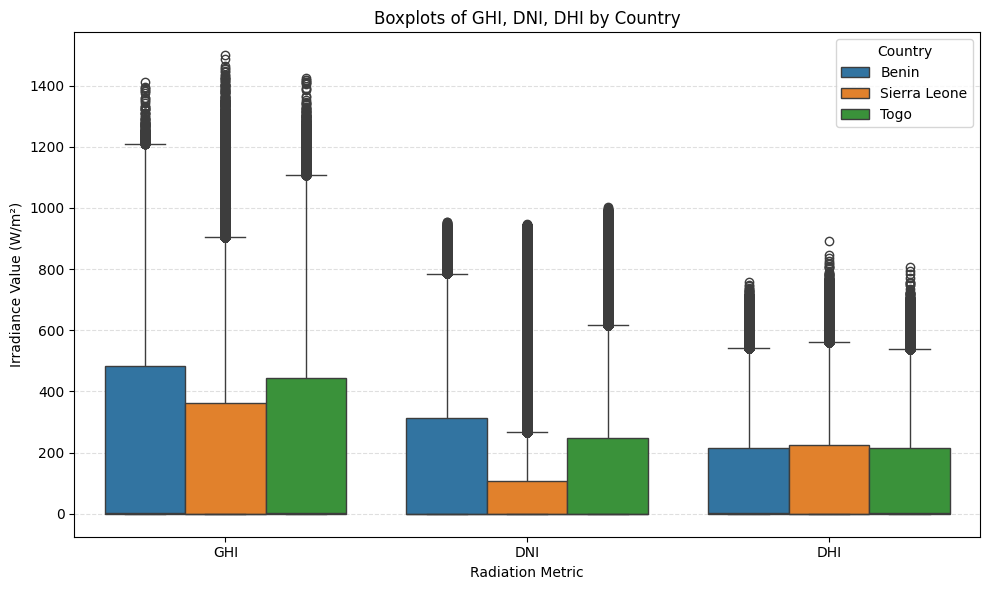

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Manually add the Country column to each DataFrame
benin['Country'] = 'Benin'
sierraleone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine the three into one DataFrame
df_all = pd.concat([benin, sierraleone, togo], ignore_index=True)

# Melt to long format for plotting
df_melted = pd.melt(
    df_all,
    id_vars='Country',
    value_vars=['GHI', 'DNI', 'DHI'],  # ensure these columns exist
    var_name='Metric',
    value_name='Value'
)

# Plot the boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x='Metric', y='Value', hue='Country')
plt.title('Boxplots of GHI, DNI, DHI by Country')
plt.xlabel('Radiation Metric')
plt.ylabel('Irradiance Value (W/m²)')
plt.legend(title='Country')
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


#### Summary Table

In [39]:
import pandas as pd

# Step 1: Add a 'Country' column to each DataFrame
benin['Country'] = 'Benin'
sierraleone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Step 2: Combine all into one DataFrame
df_all = pd.concat([benin, sierraleone, togo], ignore_index=True)

# Step 3: Group by country and calculate statistics
summary_stats = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])

# Optional: Round for better readability
summary_stats = summary_stats.round(2)

# Display the summary table
summary_stats

GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         241.96    1.8  330.10  167.44    0.0  261.55  116.99    1.6   
Sierra Leone  204.41    0.3  296.79  116.52    0.0  218.57  116.27    0.0   
Togo          231.72    2.1  321.69  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
Country               
Benin         157.46  
Sierra Leone  157.02  
Togo          156.52

### Statistical Testing

In [ ]:
from scipy.stats import kruskal

ghi_benin = benin['GHI'].dropna()
ghi_sierra = sierraleone['GHI'].dropna()
ghi_togo = togo['GHI'].dropna()

# Perform Kruskal-Wallis test
stat, p = kruskal(ghi_benin, ghi_sierra, ghi_togo)

print(f"Kruskal-Wallis H-statistic: {stat:.3f}, p-value: {p:.3e}")


Kruskal-Wallis H-statistic: 1377.982, p-value: 5.957e-300


### Key Observations

- **Benin** shows the **highest mean GHI** (241.96 W/m²) and **greatest variability** (std = 330.10), indicating more fluctuating solar irradiance.
- **Togo** has the **highest median GHI** (2.1 W/m²) and **highest median DHI**, suggesting more consistent mid-range solar radiation.
- **Sierra Leone** consistently reports the **lowest values across all metrics** (GHI, DNI, DHI), with very low medians, indicating limited solar exposure.


### Visual Summary

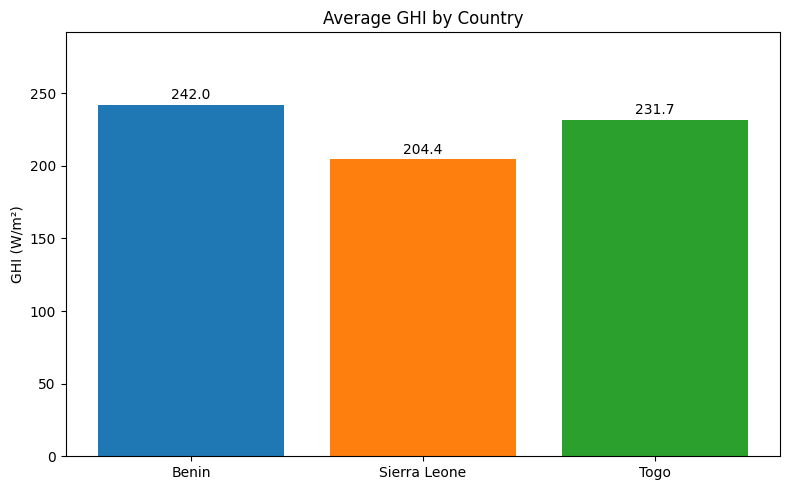

In [41]:
country_dataframes = {
    'Benin': benin,
    'Sierra Leone': sierraleone,
    'Togo': togo
}

country_names = []
avg_ghi_values = []

for country, df in country_dataframes.items():
    country_names.append(country)
    avg_ghi = df['GHI'].mean()
    avg_ghi_values.append(avg_ghi)

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(country_names, avg_ghi_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Average GHI by Country')
plt.ylabel('GHI (W/m²)')
plt.ylim(0, max(avg_ghi_values) + 50)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 2,
        f'{height:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()